In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

**S1**

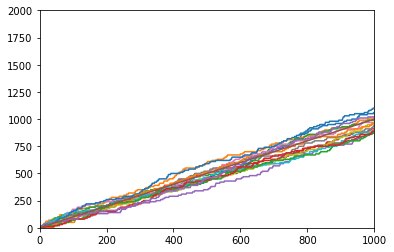

In [ ]:
def missedCountPlot(K, m, n):
    B = rnd.binomial(1, 1/K, (n, m))
    Y = np.zeros(m)
    C = np.zeros((n,m))
    for j in range(0,n) :
        for i in range(1,m) :
            Y[i] = Y[i-1] + B[j][i]
        C[j] = K*Y


    fig, ax = plt.subplots()
    plt.axis([0, m, 0, 2*m]) 
    for j in range(0,15) :
        ax.plot(list(range(1,m+1)), C[j])
    ax.plot(list(range(1,m+1)), list(range(1,m+1)))
    plt.show()

K = 10
m = 1000
n = 15

missedCountPlot(K, m, n)

**S2**

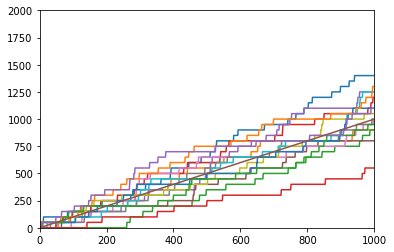

In [ ]:
missedCountPlot(50, m, n)

**T1**

On voit que $Y_m$ est une somme de variables aleatoires de bernoulli, car :
$$ Y_m = Y_{m-1} + B_m $$
D'où,

$$ Y_m = B_m+B_{m-1}+ \dots +B_1 $$

C'est facile à montrer que $Y_m$ suit donc une loi binomiale de paramètres $m$ et $1/K$

Puisque $ C_m = K \cdot Y_m $, on en déduit que $C_m$ suit la même loi que $Y_m$ mais sur l'ensemble $\{ K, 2K, \dots, mK \}$

La variance de $C_m$ sera donc $ K^2 \cdot Var(Y_m) $, i.e, 

$$ K^2 \cdot m \cdot \frac{1}{K} \cdot \left(1-\dfrac{1}{K}\right) = m(K-1)$$

En accord avec la simulation on voit bien que la variance pour $K=10$ est plus petite que celle pour $K=50$, et elle tends vers zero quand $K$ tend vers $1$


**T2**

D'après la question précedente $Y_m \sim \mathcal{B}(m,\frac{1}{K}) $ et donc on peut utiliser l'inégalité proposé. Si on pose alors $ x = \frac{\sqrt{m}}{K} $ on obtient le résultat : 

$$ \mathbb{P}\left(Y_m \ge \frac{2m}{K}\right) \le \exp\left(-2\frac{m}{K^2}\right) \le \exp\left(-\frac{m}{50}\right) $$

La dernière inégalité étant vrai parce que $ K \le 10 $.

**T3**

Si on connait $ C_m $ on connait également $ Y_m $ à partir de la rélation entre eux et il n'y a que deux possibilités pour $ C_{m+1} $. Ainsi, 
$$ \mathbb{E}[C_{m+1} | C_m] = \mathbb{E}[2^{Y_m + B_{m+1}} -1 | Y_m] = (2^{Y_m +1} - 1) \mathbb{P}(B_{m+1} = 1) + (2^{Y_m}-1) \mathbb{P}(B_{m+1} = 0) $$

Maintenant on utilise que $ \mathbb{P}(B_{m+1} = 1) = 2^{-Y_m} $ et on en déduit :  
$$ \mathbb{E}[C_{m+1} | C_m] = 2^{Y_m} = C_m + 1 $$

D'après la propriété d'espérance emboîtée,  $ \forall m \ge 1 $ : $ \mathbb{E}[C_m] = \mathbb{E}[\mathbb{E}[C_m | C_{m-1}]] = \mathbb{E}[C_{m-1} + 1] = \mathbb{E}[C_{m-1}] + 1 $

Puisque $ \mathbb{E}[C_0] = 0 $, la recurrence nous donne bien $ \mathbb{E}[C_m] = m $, $\forall m \ge 1 $.

**T4**

$ Y_m = log_{2}(C_m+1) $ et on sait que la fonction $ x \mapsto\log_{2}(x) $ est convexe, ce qui nous permet d'utiliser l'inégalité de Jansen avec $ g(X) = log_{2}(X) $ et conclure avec le résultat obtenu dans la question précedente.

$$ \mathbb{E}[Y_m] = \mathbb{E}[\log_{2}(C_m +1)] \le log_{2} \mathbb{E}[C_m+1] = \log_{2}(m+1) $$ 

Maintenant on combine ce résultat avec l'inégalité de Markov avec $ a = A log_{2}(m+1) > 0 $.

$$ \mathbb{P}(Y_m < A log_{2}(m+1)) \le \frac{\mathbb{E}[Y_m]}{A log_{2}(m+1)} \le \frac{1}{A} $$

(On rappele que $ |Y_m| = Y_m $)

**T5**

Notons que,

$$ \forall m,k \ge 1, \; \{Y_m = k\} = \{Y_{m-1}=k-1, \, B_m = 1 \} \cup \{Y_{m-1}=k, \, B_m = 0 \} $$

Alors, 

$$ \forall m,k \ge 1, \; \mathbb{P}(Y_m = k) = \mathbb{P}(B_m = 1 | Y_{m-1} = k-1) \cdot \mathbb{P}(Y_{m-1} = k-1) + \mathbb{P}(B_m = 0 | Y_{m-1} = k) \cdot \mathbb{P}(Y_{m-1} = k) $$ 

Comme $\mathbb{P}(B_m = 1) = 2^{-Y_{m-1} } $, $\, \mathbb{P}(B_m = 1|Y_{m-1} = k-1) = 2^{-(k-1)} $ et $ \mathbb{P}(B_m = 0|Y_{m-1} = k) = 1-2^{-k} $, ce qui nous donne bien le résultat pour $ k \ge 1 $.

De plus, puisque $ Y_0 = 0 $, on voit facilement que $ p_0^{(0)} = 1 $.

**S3**

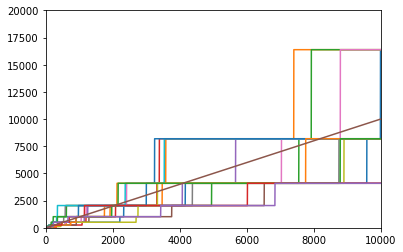

In [ ]:
def logCountPlot( m, n):
    #B = rnd.binomial(1, 1/K, (n, m))
    Y = np.zeros(m)
    C = np.zeros((n,m))
    for j in range(0,n) :
        for i in range(1,m) :
            B = rnd.binomial(1, 2**(-Y[i-1]))
            Y[i] = Y[i-1] + B
            C[j][i] = 2**(Y[i])-1
    
    fig, ax = plt.subplots()
    plt.axis([0, m, 0, 2*m]) 
    for j in range(0,15) :
        ax.plot(list(range(1,m+1)), C[j])
    ax.plot(list(range(1,m+1)), list(range(1,m+1)))
    plt.show()


m = 10000
n = 15
logCountPlot(m, n)
  

**S4**

1.

<function matplotlib.pyplot.show>

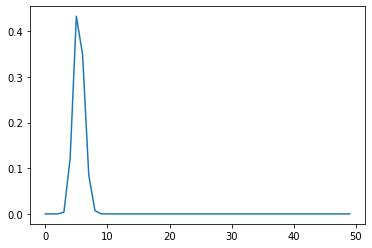

In [ ]:
m = 50
 
memoization = np.zeros((100,100))
def calculatep(m, k):
 if (k>m):
   return 0
 if(m==1):
   if (k!=1):
     return 0
   return 1;
 if (k==1):
   memoization[m][1] = (1/2)**(m-1)
   return memoization[m][1]
 if (memoization[m][k] != 0):
   return memoization[m][k]
  #Equation pour p de m et k
 memoization[m][k] = (2**(1-k))*calculatep(m-1, k-1) + (1-2**(-k))*calculatep(m-1,k)
 return memoization[m][k]
 
 
vec = [calculatep(m, i) for i in range(1, m)]
vec.insert(0,0)
plt.plot(vec)
plt.show



Teste pour $m=11$ et $k=4$

In [ ]:
print(calculatep(11, 4))

0.34508334269048646


**S4**

2.

In [ ]:

x = 2*math.log(m+1)
c = 0
for i in range(1, m):
  if (i>=x):
    c+=vec[i]

print(c)


0.007373250460961229


La probabilité obtenu est de 0,7% et, donc, l'espace d'estockage de $𝓞(log_2(log_2(m)))$ est suffisant.

**S5**

<function matplotlib.pyplot.show>

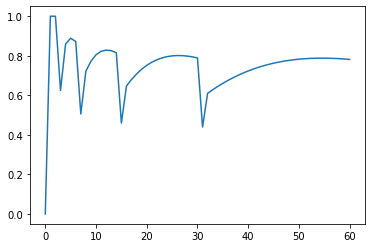

In [ ]:
m = 60
probabilities = np.zeros((m+1, 1))
for i in range(1, m+1):
  left = math.ceil(math.log((i/2+1), 2))
  right = math.floor(math.log((2*i+1), 2))
  c = 0
  for j in range(left, right+1):
    c+= calculatep(i, j)
  probabilities[i] =c

plt.plot(probabilities)
plt.show


**S6**

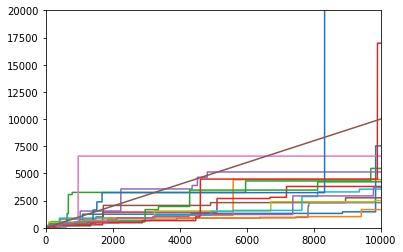

In [ ]:
def minCountPlot(m, n) :
  W = np.zeros(m, dtype = 'float')
  V = np.zeros(m, dtype = 'float')
  C = np.zeros((n+1,m), dtype = 'float')
  for j in range(0,n+1) :
    W[0] = V[0] = C[j][0] = 1   
    for i in range(1,m) :   
      U = rnd.uniform()
      mini = min(V[i-1], W[i-1], U)
      maxi = max(V[i-1], W[i-1], U)
      soma = V[i-1] + W[i-1] + U

      V[i] = mini
      W[i] = soma - mini - maxi
      C[j][i] = 1/W[i]
    
  fig, ax = plt.subplots()
  plt.axis([0, m, 0, 2*m])
  for j in range(1,n+1) :
    ax.plot(list(range(0, m)), C[j])
  ax.plot(list(range(1,m+1)), list(range(1,m+1)))
  plt.show()

n = 15
m = 10000
minCountPlot(m, n)

**T6**

Observons d'abord que $ \mathbb{P}(W_m \le t) = 1 - \mathbb{P}(W_m \ge t) $. Puis, pour que $ W_m \ge t $ il suffit qu'un total de $ m-1 $ des variables uniformes qui le composent soient minorés par t. Cela est verifié soit si les $ m $ variables sont vraiment plus grandes que t soit s'il y en a une et une seule qui est plus petite que t.  Formelement,

$$ \{W_m \ge t \} = \{ min(U_1, \dots , U_m)  \ge t \} \cup_{i=1, \dots , m} \{U_i < t, \, min(U_1, \dots, U_{i-1}, U_{i+1}, \dots, U_m) \ge t  \} $$ 


On peut utilise le fait que les $ U_i $ sont i.i.d pour calculer la probabilité de chaque ensemble. Alors, 

$$ \mathbb{P}(min(U_1, \dots , U_m)  \ge t) = \mathbb{P}(U_1 \ge t, \dots , U_m \ge t) = \mathbb{P}(U_1 \ge t)^m  = (1-t)^m $$ 
 
De même,


$$ \mathbb{P}(U_i < t, \, min(U_1, \dots, U_{i-1}, U_{i+1}, \dots, U_m) \ge t) = \mathbb{P}(U_i < t) \cdot \mathbb{P}(min(U_1 < t, \dots, U_{i-1}, U_{i+1}, \dots, U_m) \ge t) = t \cdot (1-t)^{m-1} $$ 

Maintenant on peut combiner ces deux résultats pour calcular la probabilité voulu. Ainsi,  

$$ \mathbb{P}(W_m \ge t) = (1-t)^m + mt \cdot (1-t)^{m-1} $$
D'où,

$$ \mathbb{P}(W_m \le t) = 1 - (1-t)^m - mt \cdot (1-t)^{m-1}, \, \forall t \in [0,1] $$

La densité $ f_m $ de $ W_m $ est la dérivé de sa fonction de repartition.

$$ \forall t \in [0,1], \, f_m(x) = \frac{d(\mathbb{P}(W_m \le t))}{dt} = m(m-1)t(1-t)^{m-2} $$

Finalement, on vérifie que $ C_m $ est sans bias en utilisant cette densité de probabilité,

$$ \mathbb{E}[C_m] = \mathbb{E}[\frac{1}{W_m}] = \int_{0}^{1} \frac{1}{t} \cdot f_m(t) \, \mathrm{d}t $$

D'où,

$$ \mathbb{E}[C_m] = \int_{0}^{1} m(m-1)(1-t)^{m-2} \, \mathrm{d}t = [m (1-t)^{m-1}]_{t=1}^{t=0} = m $$


**S7**

En utilisant les fonctions de répartition.

D'après **T6**, on a:
$$F_{\frac{C_m}{m}}(t) = \mathbb{P}\left(W_m ≥ \frac{1}{mt}\right) = \left( 1- \left(\frac {1}{mt}\right)\right)^m+\left(\frac{1}{t}\right)\left(1-\left(\frac{1}{mt}\right)\right)^{m-1}$$

Pour $𝓒$, on a $F_𝓒(t) = e^{-\frac{1}{t}}\left(\frac{t+1}{t}\right)$


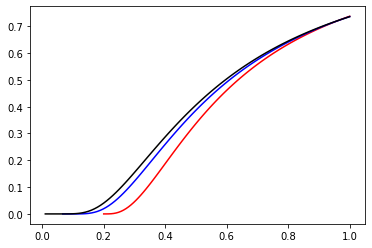

In [ ]:
def repCm_m(m,t) :
    return (1-(1/(m*t)))**m+(1/t)*((1-(1/(m*t))))**(m-1)

def repC(t) :
    return np.exp(-1/t)*(t+1)/t

# on illustre lim repCm_m(t) = repC(t) 
lim = 1

# peu d'interations (m = 5)
m = 5
t = np.linspace(1/m, lim, 100)  
plt.plot(t, repCm_m(m, t), color = 'red')

# un peu plus d'interactions (m = 15)
m = 15
t = np.linspace(1/m, lim, 100)
plt.plot(t, repCm_m(m, t), color = 'blue')

t = np.linspace(0.01, lim, 100)
plt.plot(t, repC(t), color = 'black')

plt.show()

**S8**

<function matplotlib.pyplot.show>

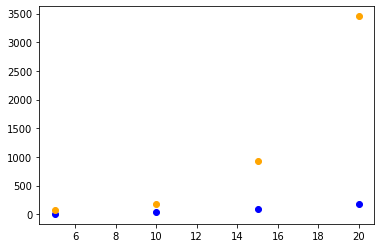

In [ ]:
arraym = [5, 10, 15, 20]
n = 10000
def logCount(m, n):
    Y = np.zeros(m)
    C = np.zeros((n,m))
    for j in range(0,n) :
        for i in range(1,m) :
            B = rnd.binomial(1, 2**(-Y[i-1]))
            Y[i] = Y[i-1] + B
            C[j][i] = 2**(Y[i])-1
    return C

def minCount(m, n) :
  W = np.zeros(m, dtype = 'float')
  V = np.zeros(m, dtype = 'float')
  C = np.zeros((n+1,m), dtype = 'float')
  for j in range(0,n+1) :
    W[0] = V[0] = C[j][0] = 1   
    for i in range(1,m) :   
      U = rnd.uniform()
      mini = min(V[i-1], W[i-1], U)
      maxi = max(V[i-1], W[i-1], U)
      soma = V[i-1] + W[i-1] + U

      V[i] = mini
      W[i] = soma - mini - maxi
      C[j][i] = 1/W[i]
  return C

cmminCount = []
cmlogCount = []
for m in arraym:
  Clog = logCount(m, n)
  clog = 0
  squarelog = 0
  expectedvslog = 0
  for i in Clog:
    squarelog+=i[-1]**2
    expectedvslog += i[-1]/n
  clog = squarelog/n - expectedvslog**2
  cmlogCount.append(clog)
  Cmin = minCount(m, n)
  cmin = 0
  squaremin = 0
  expectedvsmin = 0
  for i in Cmin:
    squaremin+=i[-1]**2
    expectedvsmin += i[-1]/n
  cmin = squaremin/n - expectedvsmin**2
  cmminCount.append(cmin)

plt.scatter(arraym ,cmlogCount, color="blue")
plt.scatter(arraym ,cmminCount, color="orange")
plt.show

On voit, donc, que l'algorithme de logCount a une variance empirique moins grande et, donc, comme les deux algorithmes ont un coût de stockage faible, logCount est l'algorithme optimal.